In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/spam (1).csv', sep='\t')

In [ ]:
df.sample(5)

,label,message,length,punct
5391,ham,Watching ajith film ah?,23,1
1972,ham,Enjoy ur life. . Good night,27,2
787,ham,It does it on its own. Most of the time it fix...,117,3
3332,ham,How much it will cost approx . Per month.,41,2
838,ham,"Sir, I have been late in paying rent for the p...",372,13


In [ ]:
len(df)

5572

1.Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
# drop last 2 cols
df.drop(columns=['length' , 'punct' ], inplace=True)

In [ ]:
df.sample(5)

,label,message
1537,ham,How's it feel? Mr. Your not my real Valentine ...
125,ham,Ü predict wat time ü'll finish buying?
3579,ham,They said ü dun haf passport or smth like dat....
3018,ham,One of the joys in lifeis waking up each daywi...
1830,spam,Hottest pics straight to your phone!! See me g...


In [ ]:
# renaming the column
df.rename(columns={'label' : 'classification' , 'message' : 'text'}, inplace=True)

In [ ]:
df.sample(5)

,classification,text
577,ham,I'm tired of arguing with you about this week ...
1070,ham,Jus finish bathing...
437,ham,"Ask g or iouri, I've told the story like ten t..."
2012,ham,Do whatever you want. You know what the rules ...
5258,ham,1 in cbe. 2 in chennai.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['classification'] = encoder.fit_transform(df['classification'])

In [ ]:
df.head()

,classification,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# missing values
df.isnull().sum()

classification    0
text              0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

2.EDA

In [ ]:
df.head()

,classification,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['classification'].value_counts()

classification
0    4516
1     653
Name: count, dtype: int64

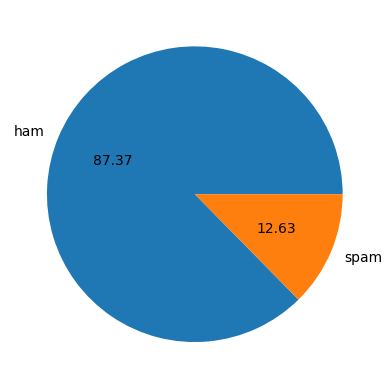

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['classification'].value_counts() , labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
! pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,classification,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,classification,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:nltk.sent_tokenize(x))


In [ ]:
df.head()

,classification,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."


In [ ]:
df[['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,79.344941,18.593538
std,58.439256,13.402779
min,2.000000,1.000000
25%,36.000000,9.000000
50%,61.000000,15.000000
75%,119.000000,26.000000
max,910.000000,220.000000


In [ ]:
df[df['classification'] == 0][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.906333,17.267715
std,56.717234,13.588065
min,2.000000,1.000000
25%,34.000000,8.000000
50%,53.000000,13.000000
75%,91.000000,22.000000
max,910.000000,220.000000


In [ ]:
# spam
df[df['classification'] == 1][['num_characters', 'num_words' , 'num_sentences']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.704441,27.762634
std,29.821348,6.993008
min,13.000000,2.000000
25%,132.000000,25.000000
50%,148.000000,29.000000
75%,157.000000,32.000000
max,223.000000,46.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

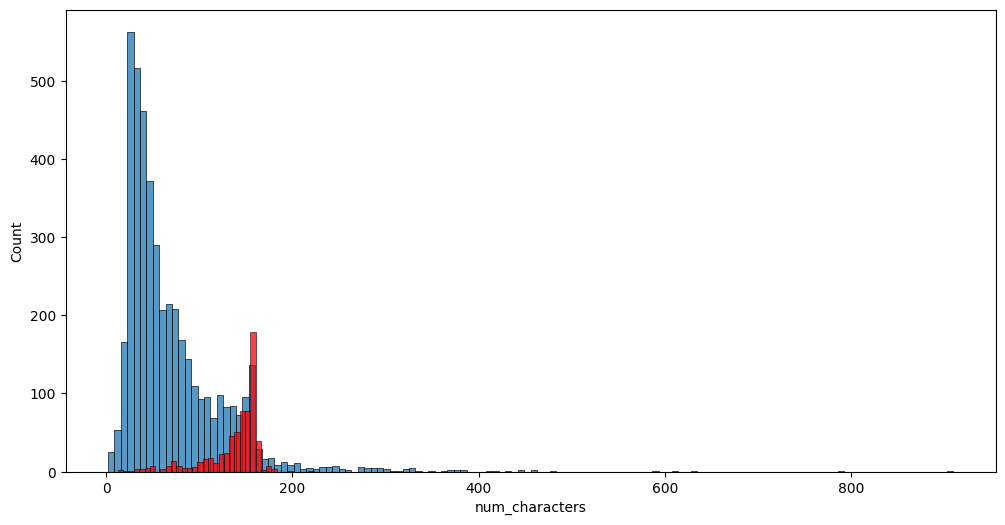

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification'] == 0]['num_characters'])
sns.histplot(df[df['classification'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

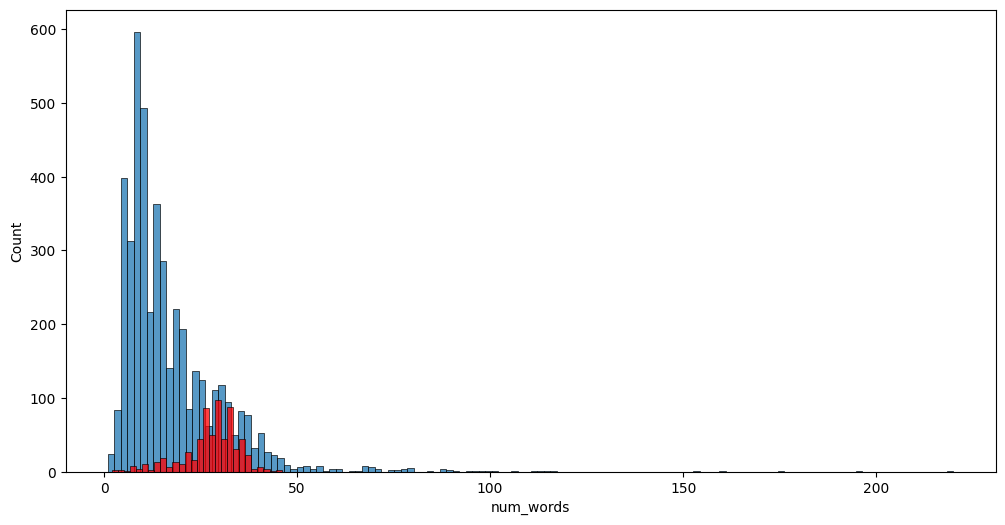

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['classification'] == 0]['num_words'])
sns.histplot(df[df['classification'] == 1]['num_words'],color='red')

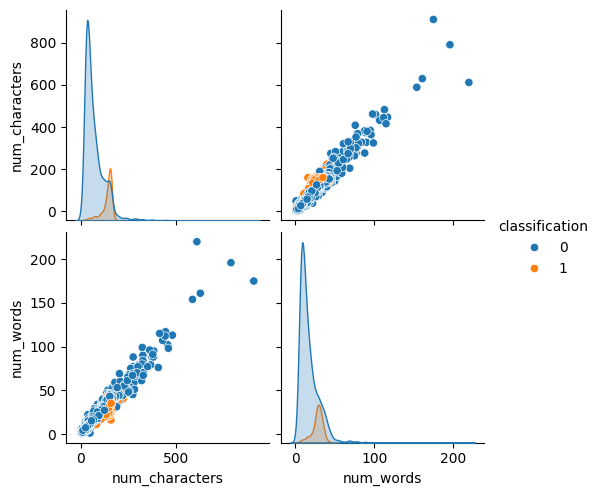

In [ ]:
sns.pairplot(df,hue='classification')

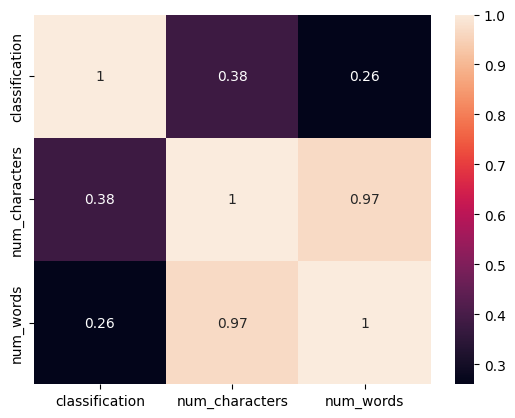

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()



3.Data Preprocessing .Lower case .Tokenization .Removing special characters .Removing stop words and punctuation .Stemming

In [ ]:
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
      if i.isalnum():
         y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)

    text = y[:]
    y.clear()

    for i in text:
         y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk.corpus

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,classification,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [ ]:
spam_wc = wc.generate(df[df['classification'] == 1]['transformed_text'].str.cat(sep=" "))


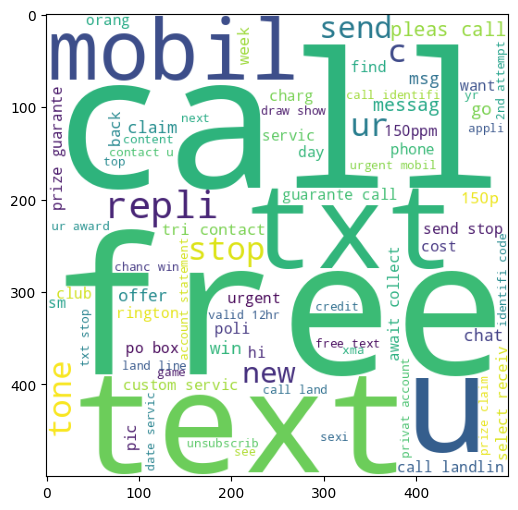

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['classification'] == 0]['transformed_text'].str.cat(sep=" "))

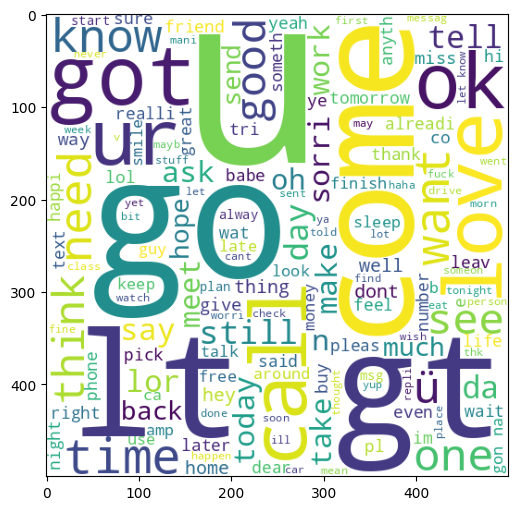

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
df.head()

,classification,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['classification'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9982

<Axes: >

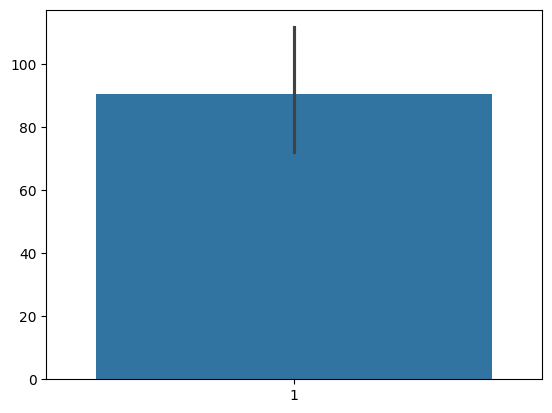

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30)))

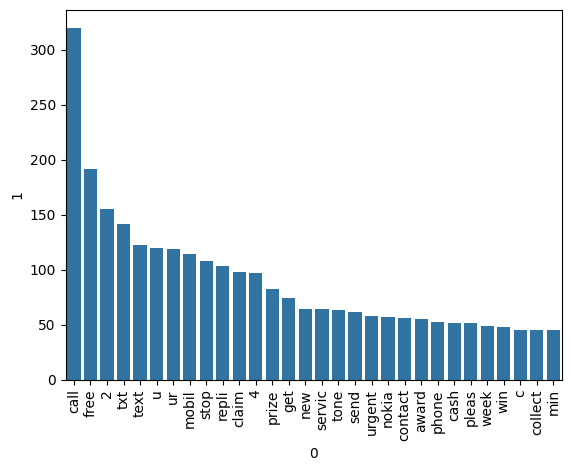

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming 'spam_corpus' is your list of words
word_counter = Counter(spam_corpus)
most_common_words = word_counter.most_common(30)

# Convert the most common words to a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['0', '1'])

# Plotting the bar plot
sns.barplot(x='0', y='1', data=df_most_common)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
ham_corpus = []
for msg in df[df['classification'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35939

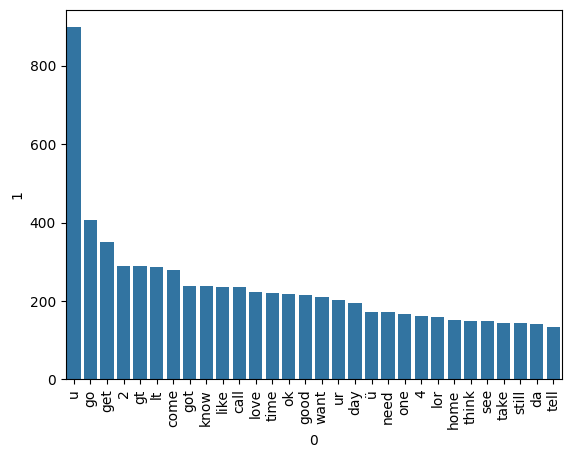

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming 'spam_corpus' is your list of words
word_counter = Counter(ham_corpus)
most_common_words = word_counter.most_common(30)

# Convert the most common words to a DataFrame
df_most_common = pd.DataFrame(most_common_words, columns=['0', '1'])

# Plotting the bar plot
sns.barplot(x='0', y='1', data=df_most_common)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,classification,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]",ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar...",nah think goe usf live around though


4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df['classification'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8617021276595744
[[788 120]
 [ 23 103]]
0.4618834080717489


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[908   0]
 [ 32  94]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9748549323017408
[[906   2]
 [ 24 102]]
0.9807692307692307


In [ ]:
# tfidf --> MNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9900990099009901)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9900990099009901
For  KN
Accuracy -  0.9187620889748549
Precision -  1.0
For  NB
Accuracy -  0.9690522243713733
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9468085106382979
Precision -  0.9176470588235294
For  RF
Accuracy -  0.9671179883945842
Precision -  0.9693877551020408
For  AdaBoost
Accuracy -  0.9661508704061895
Precision -  0.9333333333333333
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.8898305084745762
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9811320754716981
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9240506329113924
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9591836734693877


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.918762,1.000000
2,NB,0.969052,1.000000
0,SVC,0.973888,0.990099
8,ETC,0.976789,0.981132
5,RF,0.967118,0.969388
10,xgb,0.965184,0.959184
6,AdaBoost,0.966151,0.933333
9,GBDT,0.942940,0.924051
4,LR,0.946809,0.917647
7,BgC,0.967118,0.889831


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.918762
1,NB,Accuracy,0.969052
2,SVC,Accuracy,0.973888
3,ETC,Accuracy,0.976789
4,RF,Accuracy,0.967118
5,xgb,Accuracy,0.965184
6,AdaBoost,Accuracy,0.966151
7,GBDT,Accuracy,0.942940
8,LR,Accuracy,0.946809
9,BgC,Accuracy,0.967118


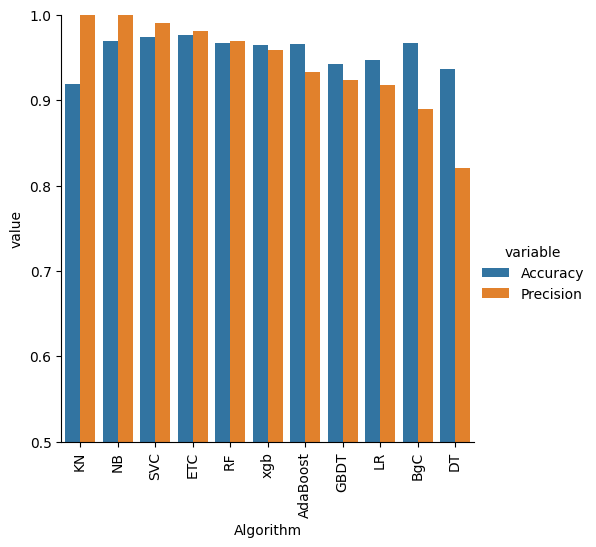

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
import pandas as pd
!ls
# Print the contents of the current working directory
!pwd

# Print the system environment variables
!env

# Print the Python interpreter version
!python --version
# Provide code to recreate the new_df_scaled dataframe





sample_data
/content
SHELL=/bin/bash
NV_LIBCUBLAS_VERSION=12.2.5.6-1
NVIDIA_VISIBLE_DEVICES=all
COLAB_JUPYTER_TRANSPORT=ipc
NV_NVML_DEV_VERSION=12.2.140-1
NV_CUDNN_PACKAGE_NAME=libcudnn8
CGROUP_MEMORY_EVENTS=/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events
NV_LIBNCCL_DEV_PACKAGE=libnccl-dev=2.19.3-1+cuda12.2
NV_LIBNCCL_DEV_PACKAGE_VERSION=2.19.3-1
VM_GCE_METADATA_HOST=169.254.169.253
HOSTNAME=92202376449e
LANGUAGE=en_US
TBE_RUNTIME_ADDR=172.28.0.1:8011
COLAB_TPU_1VM=
GCE_METADATA_TIMEOUT=3
NVIDIA_REQUIRE_CUDA=cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,driver<471 brand=tesla,driver>=525,driver<526 brand=unknown,driver>=525,driver<526 b

In [ ]:
new_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.918762,1.000000,0.918762,1.000000,0.918762,1.000000
1,NB,0.969052,1.000000,0.969052,1.000000,0.969052,1.000000
2,SVC,0.973888,0.990099,0.973888,0.990099,0.973888,0.990099
3,ETC,0.976789,0.981132,0.976789,0.981132,0.976789,0.981132
4,RF,0.967118,0.969388,0.967118,0.969388,0.967118,0.969388
5,xgb,0.965184,0.959184,0.965184,0.959184,0.965184,0.959184
6,AdaBoost,0.966151,0.933333,0.966151,0.933333,0.966151,0.933333
7,GBDT,0.942940,0.924051,0.942940,0.924051,0.942940,0.924051
8,LR,0.946809,0.917647,0.946809,0.917647,0.946809,0.917647
9,BgC,0.967118,0.889831,0.967118,0.889831,0.967118,0.889831


In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9904761904761905


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.svm import SVC  # Example classifier, replace with your classifier
# Assuming you have already defined X_train, X_test, y_train, y_test

# Instantiate the classifier (replace with your chosen classifier)
clf = SVC()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy and precision scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Accuracy: 0.9690522243713733
Precision: 0.9895833333333334


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))